In [1]:
from glob import glob
import os

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

from rasterio.plot import show

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

# Combining 60M bands

In [2]:
imagePath = '/home/shrayank_mistry/Modules/Preprocessing Data/Sentinel2/GRANULE/L2A_T43QCA_A030561_20210429T053913/IMG_DATA/R60m/'

In [3]:
bands_60 = glob(imagePath+'*B*.jp2')
bands_60.sort()

In [4]:
print("Total Bands = ", len(bands_60))

Total Bands =  11


In [5]:
stacked_60 = []
for img in bands_60:
    with rasterio.open(img, 'r') as f:
        stacked_60.append(f.read(1))
stacked_60 = np.stack(stacked_60)

In [6]:
print("Stacked shape = ", np.array(stacked_60).shape)

Stacked shape =  (11, 1830, 1830)


In [7]:
titles = [f'band-{i}' for i in range(1, 13)]
titles.remove('band-10')

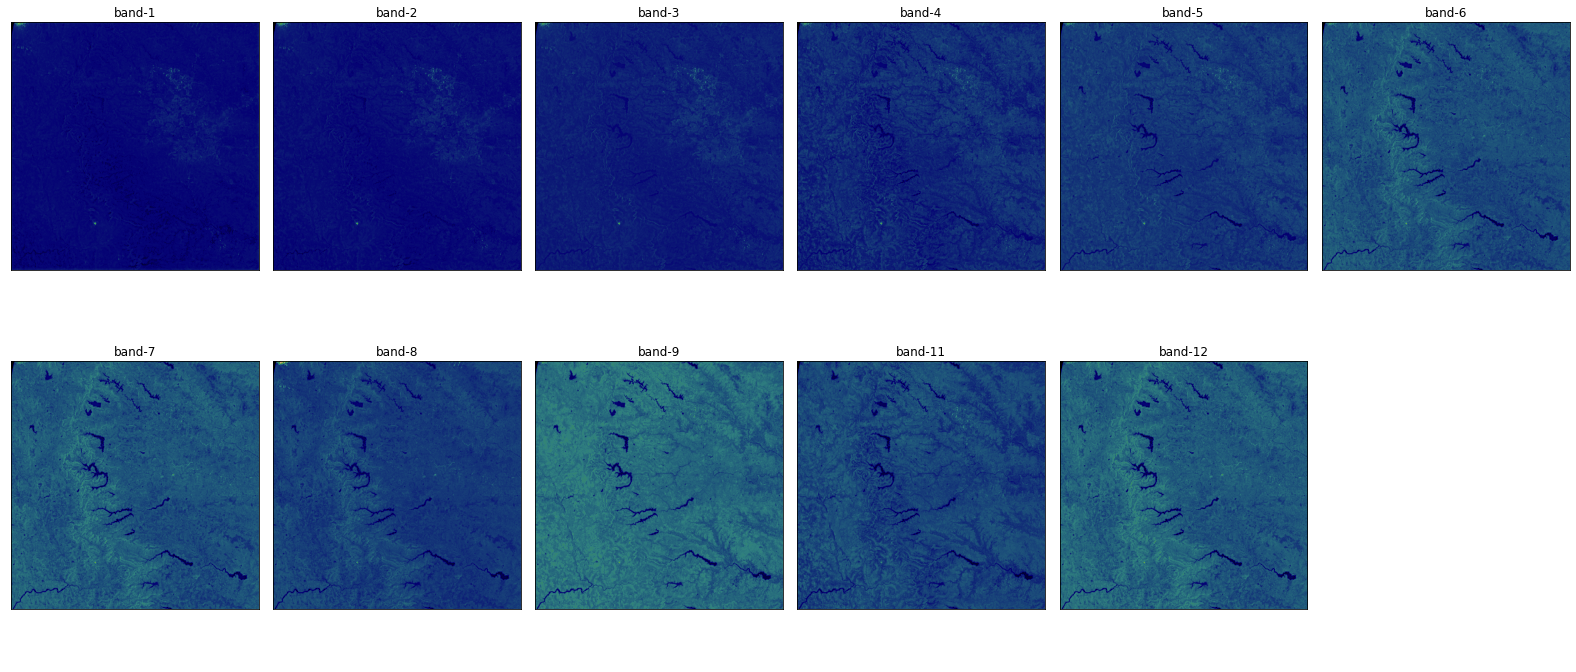

In [8]:
# Visualize each of the 11 bands-
ep.plot_bands(
    arr = stacked_60, cmap = 'gist_earth',
    figsize = (22, 10), cols = 6,
    cbar = False, title = titles)

plt.show()

# Combining 20M bands

In [9]:
imagePath = '/home/shrayank_mistry/Modules/Preprocessing Data/Sentinel2/GRANULE/L2A_T43QCA_A030561_20210429T053913/IMG_DATA/R20m/'

In [10]:
bands_20 = glob(imagePath+'*B*.jp2')
bands_20.sort()

In [11]:
stacked_20 = []
for img in bands_20:
    with rasterio.open(img, 'r') as f:
        stacked_20.append(f.read(1))
stacked_20 = np.stack(stacked_20)

In [12]:
print("Stacked shape = ", np.array(stacked_20).shape)

Stacked shape =  (9, 5490, 5490)


In [13]:
titles = [f'band-{i}' for i in range(1, 13)]
titles.remove('band-1')
titles.remove('band-9')
titles.remove('band-10')

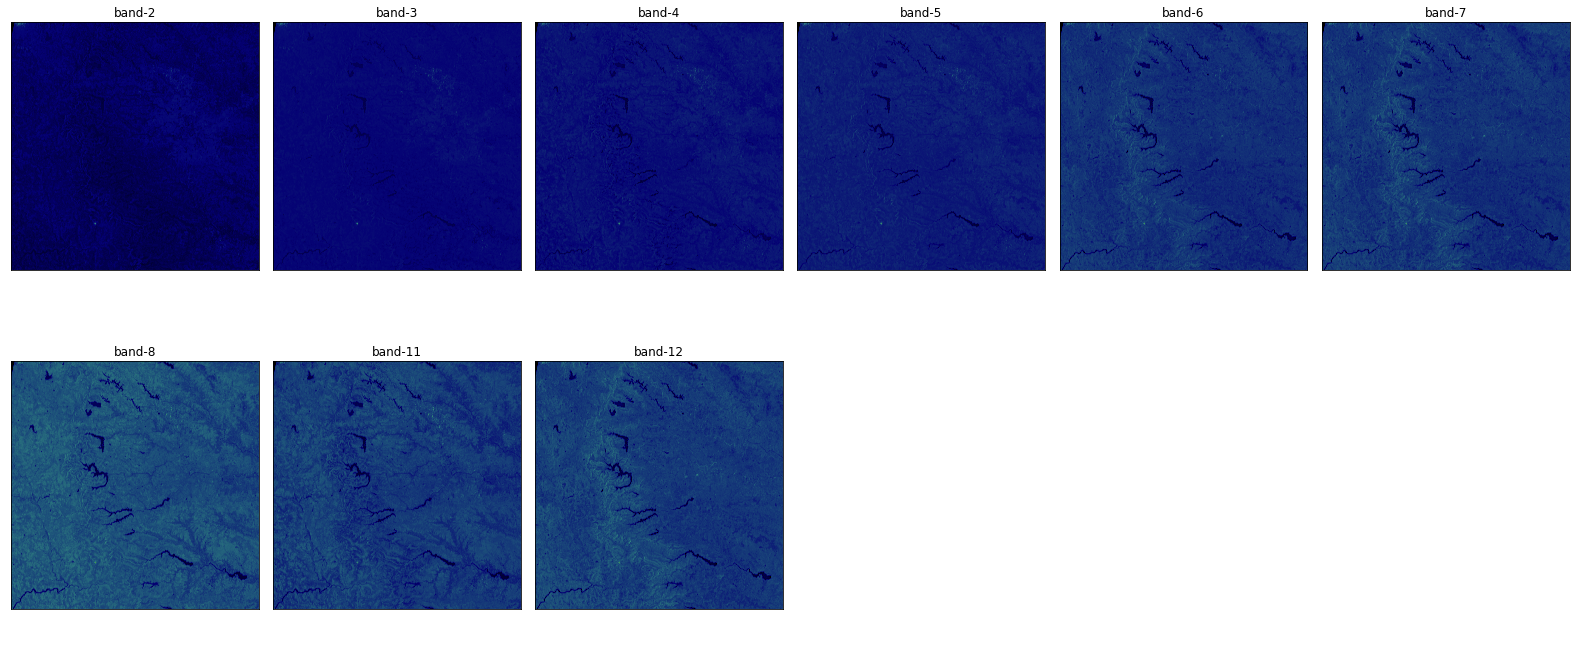

In [14]:
# Visualize each of the 11 bands-
ep.plot_bands(
    arr = stacked_20, cmap = 'gist_earth',
    figsize = (22, 10), cols = 6,
    cbar = False, title = titles)

plt.show()

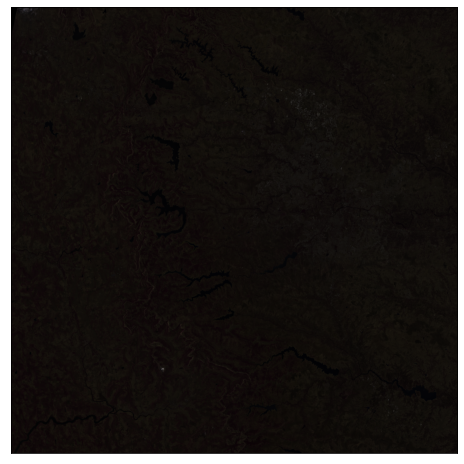

In [15]:
rgb = ep.plot_rgb(
    arr = stacked_20, 
    rgb = (3,2,1), 
    figsize = (8, 10))
plt.show()

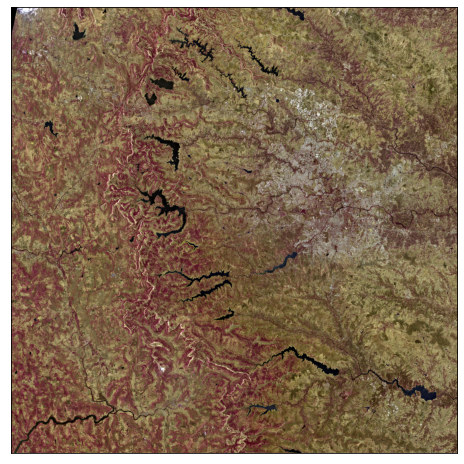

In [58]:
ep.plot_rgb(
    arr = stacked_20,
    rgb = (3, 2, 1),
    stretch = True,
    str_clip = 0.2,
    figsize = (8, 10))

plt.show()

In [47]:
x = np.moveaxis(stacked_20, 0, -1)
x.shape

(5490, 5490, 9)

In [48]:
x.reshape(-1, 9).shape, 5490 * 5490

((30140100, 9), 30140100)

In [49]:
X_data = x.reshape(-1, 9)
scaler = StandardScaler().fit(X_data)
X_scaled = scaler.transform(X_data)
X_scaled.shape

(30140100, 9)

In [50]:
pca = PCA(n_components = 4)
pca.fit(X_scaled)
data = pca.transform(X_scaled)
data.shape

(30140100, 4)

In [51]:
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.59938271 0.29209657 0.08713154 0.01277769]
0.9913885110391466


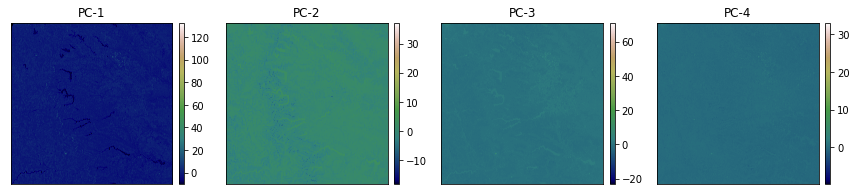

In [52]:
ep.plot_bands(np.moveaxis(data.reshape((5490, 5490, data.shape[1])), -1, 0),
              cmap = 'gist_earth',
              cols = 4,
              title = [f'PC-{i}' for i in range(1,5)]
              )

plt.show()

In [53]:
kmeans = KMeans(n_clusters = 4, random_state = 11)
kmeans.fit(data)

KMeans(n_clusters=4, random_state=11)

In [54]:
labels = kmeans.predict(data)

In [55]:
np.unique(labels)

array([0, 1, 2, 3], dtype=int32)

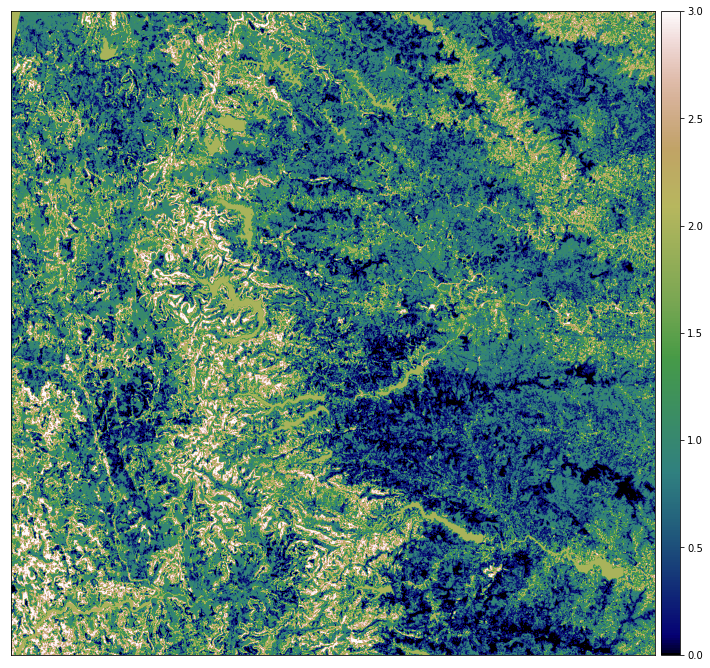

In [56]:
ep.plot_bands(labels.reshape(5490, 5490), cmap = 'gist_earth')
plt.show()

# Analysis on Preprocessed TIFF files

In [27]:
imagePath = '/home/shrayank_mistry/Modules/Preprocessing Data/Cliped/'

In [28]:
bands = glob(imagePath+'*B*.tif')
bands.sort()

In [29]:
clip_stacked = []
for b in bands:
    with rasterio.open(b, 'r') as f:
        clip_stacked.append(f.read(1))

In [30]:
N = len(clip_stacked)
for i in range(N):
    print(clip_stacked[i].shape)

(2994, 3101)
(2994, 3101)
(2994, 3101)
(2994, 3101)
(2994, 3101)
(2994, 3101)
(2994, 3101)
(2994, 3101)
(2994, 3101)
(2994, 3101)


In [31]:
arr_st = np.stack(clip_stacked)

In [32]:
print(f'Height: {arr_st.shape[1]}\nWidth: {arr_st.shape[2]}\nBands: {arr_st.shape[0]}')

Height: 2994
Width: 3101
Bands: 10


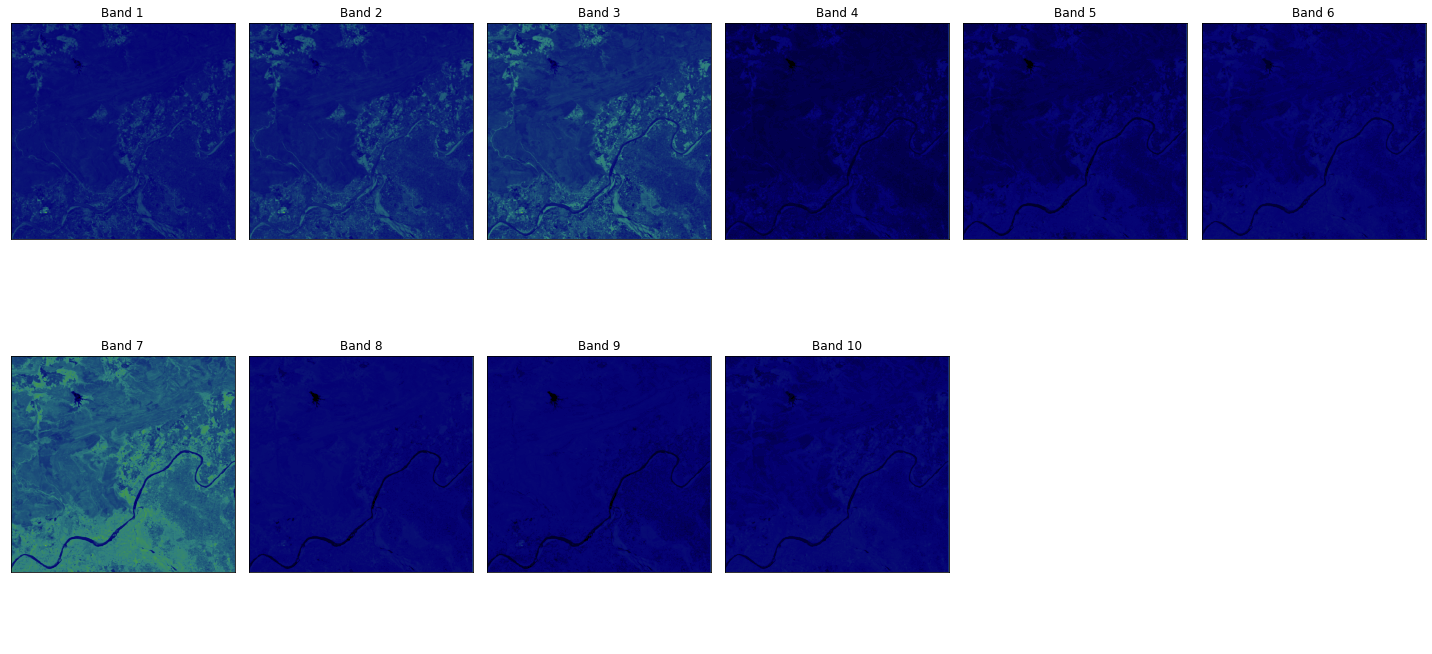

In [33]:
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 10), cols = 6, cbar = False)
plt.show()

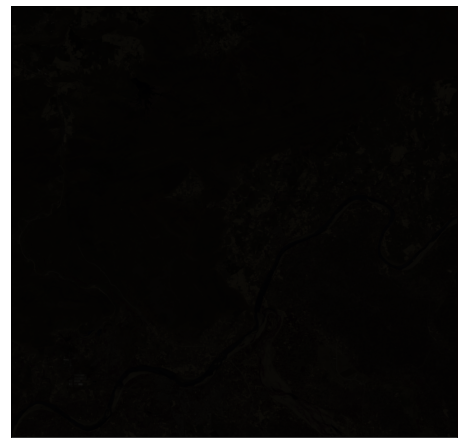

In [34]:
rgb = ep.plot_rgb(
    arr = arr_st, 
    rgb = (3,2,1), 
    figsize = (8, 10))

plt.show()

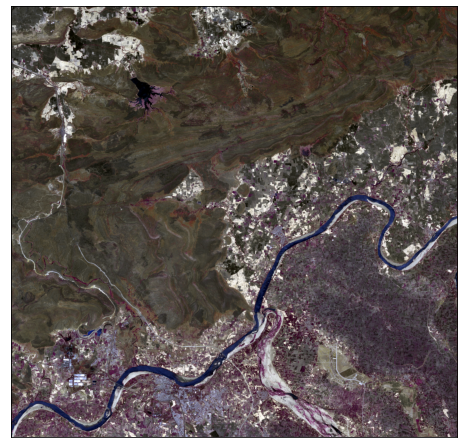

In [35]:
ep.plot_rgb(
    arr = arr_st,
    rgb = (3, 2, 1),
    stretch = True,
    str_clip = 0.2,
    figsize = (8, 10))

plt.show()

In [36]:
x = np.moveaxis(arr_st, 0, -1)
x.shape

(2994, 3101, 10)

In [37]:
x.reshape(-1, 10).shape, 2994 * 3101

((9284394, 10), 9284394)

In [38]:
X_data = x.reshape(-1, 10)
scaler = StandardScaler().fit(X_data)
X_scaled = scaler.transform(X_data)
X_scaled.shape

(9284394, 10)

In [39]:
pca = PCA(n_components = 4)
pca.fit(X_scaled)
data = pca.transform(X_scaled)
data.shape

(9284394, 4)

In [40]:
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.65029909 0.27674797 0.05076637 0.01528322]
0.9930966578625454


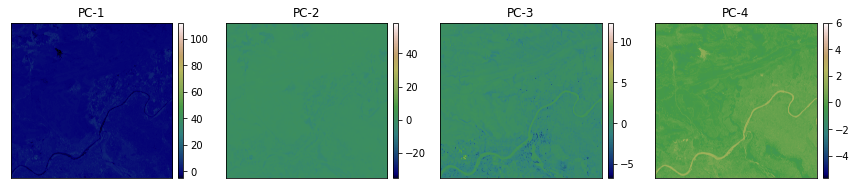

In [41]:
ep.plot_bands(np.moveaxis(data.reshape((2994, 3101, data.shape[1])), -1, 0),
              cmap = 'gist_earth',
              cols = 4,
              title = [f'PC-{i}' for i in range(1,5)]
              )

plt.show()

In [42]:
kmeans = KMeans(n_clusters = 10, random_state = 11)
kmeans.fit(data)

KMeans(n_clusters=10, random_state=11)

In [43]:
labels = kmeans.predict(data)

In [44]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

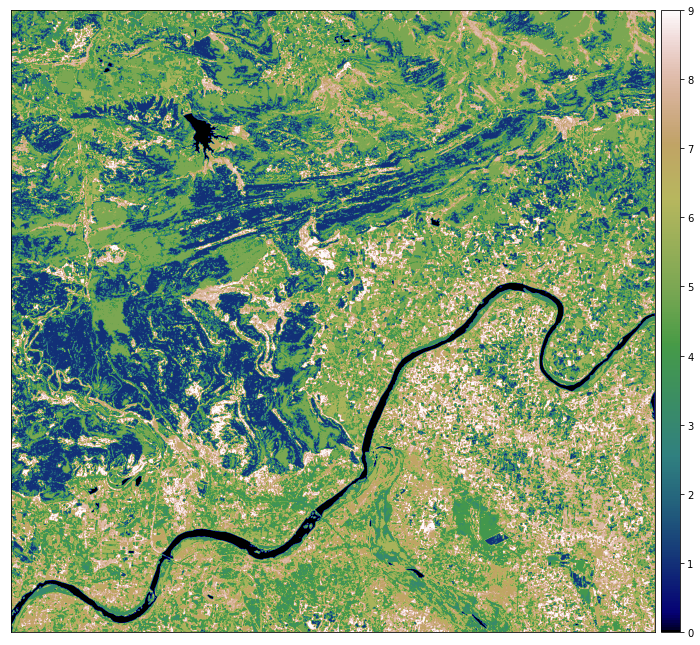

In [45]:
ep.plot_bands(labels.reshape(2994, 3101), cmap = 'gist_earth')
plt.show()

In [46]:
# ep.plot_bands(labels.reshape(2994, 3101), cmap=ListedColormap(['darkgreen', 'green', 'black', 'navy', '#CA6F1E', 'forestgreen']))
# plt.show()